In [32]:
from numpy import *
from matplotlib.pyplot import *
from numpy import log as ln

In [33]:
D1 = 0.2 #m
r1 = D1/2
Ts1 = 545 #K
Tinf = 300 #K
vinf = 7 #m/s
Tw = 550 #K
vw = 7 #m/s
kCaSi = 0.07 #W/m*K
L = 6 #m
rho = 1.1769 #kg/m^2
mu = 1.8464E-5 #kg/m*s
k = 2.624E-2  #W/m*k
D2 = array([0, 0.025, 0.050, 0.075]) #m
r2 = D2/2
rtot = r2 + r1

Ts2 = [0,0,0,0]
Qconv = [0,0,0,0]

e1 = 0.28
e2 = 0.8
stef = 5.676E-8 #W/m^2K^4

Qrad = [0,0,0,0]
A = [0,0,0,0]

In [34]:
Re = (rho*vw*(D2+D1))/(mu)
print(Re)
B = 0.027
n = 0.805
Pr = .708
NuD = B*Re**n*Pr*(1/3)
print(NuD)

[ 89236.35181976 100390.89579723 111545.4397747  122699.98375217]
[61.58315317 67.70795585 73.70118697 79.57847162]


In [35]:
h = NuD*k/(D2+D1)
print(h)

[8.0797097  7.89625227 7.73567658 7.59323307]


In [36]:
for i, ri in enumerate(rtot):
    if ri == rtot[0]:
        Qconv[i] = h[i] * 2 * pi * ri * L * (Ts1 - Tinf)

    else:
        Ts2[i] = (kCaSi*Ts1/ri/ln(ri/rtot[0])+h[i]*Tinf)/(h[i]+ kCaSi/ri/ln(ri/rtot[0]))
        Qconv[i] = h[i] * 2 * pi * ri * L * (Ts2[i] - Tinf)

In [37]:
for i, ri in enumerate(rtot):
    A[i] = 2 * pi * ri * L
    
    if ri == rtot[0]:
        Qrad[i] = e1 * stef * A[i] * (Ts1**4 - Tinf**4)

    else: 
        F12 = 1
        F21 = rtot[0]/ri
        
        Rg1 = (1-e1)/(A[0]*e1)
        Rg2 = (1-e2)/(A[i]*e2)
        R1s = 1/(A[0]*F12)
        R2s = 1/(A[i]*F21)
        Rtot = Rg1 + Rg2 + R1s + R2s
        
        

        Qrad[i] = stef * (Ts1**4 - Tinf**4) / Rtot

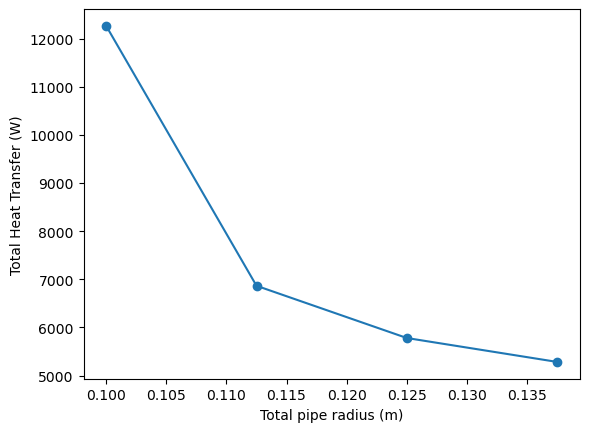

In [42]:
Qconv = array(Qconv)
Qrad = array(Qrad)
Q = Qconv+ Qrad

plot(rtot, Q, '-o')
xlabel('Total pipe radius (m)')
ylabel('Total Heat Transfer (W)')
show()

In [ ]:
Q